<a href="https://colab.research.google.com/github/akanksha0911/AdvDL_FinalProject/blob/main/AdvDL_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Final Project**

### **Title - CIFAR-100 Image Recognition Using Transfer Learning - EfficientNet-B0**

Team Members - 
<ul>
<li>Akanksha Rawat</li>
<li>Karishma Kuria</li>
<li>Nisha Mohan Devadiga</li>
</ul>

..


**Abstract:**

Convolutional neural network (CNN) is a class of deep neural network commonly used to analyze images. The objective of this project is to build a convolutional neural network model that can correctly recognize and classify colored images of objects into one of the 100 available classes for CIFAR-100 dataset. The recognition of images in this project has been done using transfer learning approach.

 The network built in this project uses the state-of-the-art EfficientNet-B0 which was trained on the popular, challenging and large ImageNet dataset. 
 
 Transfer learning and the idea of intelligently scaling the network (carefully balancing the network's width, depth and resolution) helped in getting a good performance on this dataset. By just training the model for 15 epochs, the model managed to achieve an accuracy of 82 percent. This is definitely a much better performance than the one achieved using a 9-layer convolutional neural network model trained for 100 epochs. The training of the model has been done on a GPU and the model has also been tested on some new random images to visualize the top 5 category predictions along with their probabilities.


---



**Motivation:**

The motivation behind working on this dataset using transfer learning is the challenge of achieving a good
accuracy score (more than 59 % as achieved using a
9-layer convolutional neural network built earlier). The
dataset has 100 classes but just 600 images in each
class (500 for training and 100 for testing). The most
interesting part of this dataset is the image quality. Each
of the image in the dataset is of 32 × 32 pixels which
makes recognition a challenging task for machine. So
in order to train the machine to correctly recognize and
classify the images better than earlier, transfer learning
approach has been used. However, the main limitation
for building a deep neural network for CIFAR-100 with
millions of parameters is memory. But, I felt that dealing
with all these challenges would be a great learning and I
decided to proceed with this dataset.

**What is CIFAR-100 dataset?**

The Python version of this dataset can be downloaded from the website of the University of Toronto Computer Science. The downloaded files are Python pickled objects produced using cPickle.

CIFAR-100 is a labeled subset of 80 million tiny images dataset where CIFAR stands for Canadian Institute For Advanced Research. The images were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The dataset consists of 60000 colored images (50000 training and 10000 test) of 32 × 32 pixels in 100 classes grouped into 20 superclasses. Each image has a fine label (class) and a coarse label (superclass).

We have imported the CIFAR-100 dataset, which contains a large number of photos of people of different ages and genders. There are only 600 photos in each of the dataset's 100 classes (500 for training and 100 for testing). The visual quality of this dataset is what I find most fascinating. The collection contains 32 32 pixel images, making it difficult for computers to recognize them. Therefore, a transfer learning approach has been utilized to teach the machine to accurately recognize and classify the photos better than it did previously. The biggest obstacle to creating a deep neural network with millions of parameters for CIFAR-100 is memory. We have used a balanced dataset.

# Import necessary libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import tensorflow as tf
import keras
get_ipython().run_line_magic('matplotlib', 'inline')
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense 
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint , ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.transform import resize
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D 
# from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import seaborn as sns
import cv2
import albumentations as albu
import time

Connect to google drive to access the CIFAR-100 datasets.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup Wandb

In [3]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 25.2 MB/s 
     |████████████████████████████████| 168 kB 73.6 MB/s 
     |████████████████████████████████| 182 kB 71.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 75.7 MB/s 
     |████████████████████████████████| 166 kB 63.2 MB/s 
     |████████████████████████████████| 166 kB 79.3 MB/s 
     |████████████████████████████████| 162 kB 72.0 MB/s 
     |████████████████████████████████| 162 kB 70.5 MB/s 
     |████████████████████████████████| 158 kB 79.7 MB/s 
     |████████████████████████████████| 157 kB 77.4 MB/s 
     |████████████████████████████████| 157 kB 82.6 MB/s 
     |████████████████████████████████| 157 kB 80.6 MB/s 
     |████████████████████████████████| 157 kB 80.4 MB/s 
     |████████████████████████████████| 157 kB 74.8 MB/s 
     |████████████████████████████████| 157 kB 81.1 MB/s 
     |████████████████████████████████| 157 kB 79.9 MB/s 
     |██████████

In [4]:
# Log in to your W&B account
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [5]:
import wandb
from wandb.keras import WandbCallback

In [6]:
wandb.init(project="FinalProject_TL_IC", entity="akanksha09")

wandb: Currently logged in as: akanksha09. Use `wandb login --relogin` to force relogin


Function to load the pickled files

In [7]:
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

#Load CIFAR-100 Datasets for modeling

## Fetch the Train Data

In [8]:
trainData = unpickle('/content/drive/MyDrive/AdvDLProject/cifar-100-python/train')

List type of items in each file

In [9]:
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


Print the number of images in the training dataset

In [10]:
print(len(trainData['data']))
print(len(trainData['data'][0]))

50000
3072


Print the number of unique categories of the images.

In [11]:
print(np.unique(trainData['fine_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Print the number of unique coarse labels of the images.

In [12]:
print(np.unique(trainData['coarse_labels']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Prints total number of data batch

In [13]:
print(trainData['batch_label'])

training batch 1 of 1


Lists out the total number of images for all categories

In [14]:
print(len(trainData['filenames']))

50000


## Fetch the Test Data

In [15]:
testData = unpickle('/content/drive/MyDrive/AdvDLProject/cifar-100-python/test')

## Fetch the Meta Data

In [16]:
metaData = unpickle('/content/drive/MyDrive/AdvDLProject/cifar-100-python/meta')

Storing coarse labels along with its number code in a dataframe

In [17]:
category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])
category


,SuperClass
0,aquatic_mammals
1,fish
2,flowers
3,food_containers
4,fruit_and_vegetables
5,household_electrical_devices
6,household_furniture
7,insects
8,large_carnivores
9,large_man-made_outdoor_things


Storing fine labels along with its number code in a dataframe

In [18]:
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
subCategory

,SubClass
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver
...,...
95,whale
96,willow_tree
97,wolf
98,woman


The above list shows fine label number and name, which we are denoting as subcategories.


In [19]:
X_train = trainData['data']
X_train

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       ...,
       [248, 240, 236, ..., 180, 174, 205],
       [156, 151, 151, ..., 114, 107, 126],
       [ 31,  30,  31, ...,  72,  69,  67]], dtype=uint8)

4D array input for building the CNN model using Keras.

In [20]:
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

Generate a random number to display a random image from the dataset along with the label's number and name


Image number selected : 47022
Shape of image : (32, 32, 3)
Image category number: 3
Image category name: Food_containers
Image subcategory number: 28
Image subcategory name: Cup


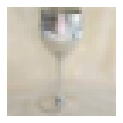

In [21]:
rcParams['figure.figsize'] = 2,2

imageId = np.random.randint(0, len(X_train))

plt.imshow(X_train[imageId])

plt.axis('off')

print("Image number selected : {}".format(imageId))
print("Shape of image : {}".format(X_train[imageId].shape))
print("Image category number: {}".format(trainData['coarse_labels'][imageId]))
print("Image category name: {}".format(category.iloc[trainData['coarse_labels'][imageId]][0].capitalize()))
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

16 random images to display at a time along with their true labels.

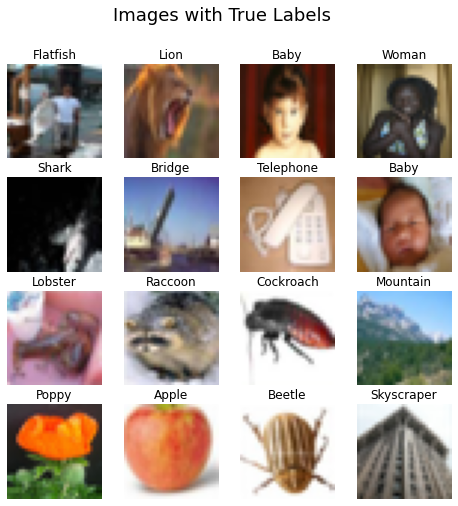

In [22]:

rcParams['figure.figsize'] = 8,8

num_row = 4
num_col = 4

#to get 4 * 4 = 16 images together
imageId = np.random.randint(0, len(X_train), num_row * num_col)
#imageId

fig, axes = plt.subplots(num_row, num_col)
plt.suptitle('Images with True Labels', fontsize=18)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_train[imageId[k]])
        axes[i,j].set_title(subCategory.iloc[trainData['fine_labels'][imageId[k]]][0].capitalize())
        axes[i,j].axis('off')

# Data Pre-processing

Transforming the testing dataset.

In [23]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
X_test.shape

(10000, 32, 32, 3)

In [24]:
y_train = trainData['fine_labels']

y_test = testData['fine_labels']

In [25]:
num_class = 100

y_train = keras.utils.to_categorical(y_train, num_class)

y_test = keras.utils.to_categorical(y_test, num_class)

In [26]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Rescaling Images.

Rescaling by dividing every image pixel by 255.

In [27]:
X_train = X_train / 255.

X_test = X_test / 255.

#Experimentation 1 - Initializing CNN model.

In the first part, we have built a Fully  Connected Convolutional neural networks architecture and Keras-high level API of tensorflow framework in multiple layers.

***Here , we are using three stacks of layer combinations  - Conv2D , Conv2D, MaxPool2D and Dropout layers.***

Each stack has two Conv2D layers with the same padding , ReLu activation, followed by MaxPool2D with pool size of 2, strides of 2. Dropout layer is the layer of the stack having dropout value of 0.2 which gradually increases to 0.5 in next 2 stacks. Dropout layer prevents the network from overfitting and helps the network generalize better. 



In [28]:
model = Sequential()

#Stack 1
#convolution
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout 
model.add(Dropout(0.2))

#Stack 2
#convolution
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout 
model.add(Dropout(0.5))

#Stack 3
#convolution
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
#pooling
model.add(MaxPool2D(pool_size=2, strides=2))
#dropout 
model.add(Dropout(0.5))

#flattening
model.add(Flatten())

#full connection
model.add(Dense(units=1000, activation="relu"))
#dropout 
model.add(Dropout(0.5))

#full connection
model.add(Dense(units=1000, activation="relu"))
#dropout 
model.add(Dropout(0.5))

#output layer
model.add(Dense(units=num_class, activation="softmax"))

### Summarize the model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)       590080    
                                                        

##Compile the model

We are using Adam Optimizer.

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [30]:
epochs = 50
batch_size = 64

optimizer = keras.optimizers.Adam(lr=0.0001)

#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


We use early stopping strategy to monitor the validation loss and avoid overfitting.  In the similar lines, we will use ModelCheckpoint for saving the model checkpoint for the best model.

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [32]:
%cd /content/drive/MyDrive/AdvDLProject
model.save('best_model.h5')

/content/drive/.shortcut-targets-by-id/1D_78eEMNs_gbuhOGd-fji29bTLd5zzp7/AdvDLProject


## Apply Image Augmentation
 
Perform Image Augmentation to expand the training dataset using techniques like Image Shifting, Image Flipping, Image Zooming and Image Tilting /Perspective.

In [33]:
#validation split to test the model 
data_gen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            featurewise_center=True,
            width_shift_range=0.1,
            validation_split=0.2)

data_gen.fit(X_train, seed=123)

train_data_gen = data_gen.flow(X_train, y_train, 
                               batch_size=batch_size, 
                               subset="training", seed=123)

valid_data_gen = data_gen.flow(X_train, y_train, 
                               batch_size=batch_size, 
                               subset="validation", seed=123)


## Train Model.

In [34]:
def train_utils(model, run_name, model_name):
    # Initialize wandb
    wandb.init(project="FinalProject_TL_IC", entity="akanksha09", id=run_name)

    # Train the model
    start = time.time()
    model_history = model.fit_generator(train_data_gen,
                                        steps_per_epoch=40000//batch_size,
                                        validation_data=valid_data_gen,
                                        validation_steps=10000//batch_size,
                                        callbacks=[early_stop, model_checkpoint, [WandbCallback()]],
                                        verbose=1,
                                        epochs=epochs)
    end = time.time() - start
    print("model training time", end)
    wandb.log({"training_time":end})

    # Serialize the model to see the footprint
    model.save(model_name)

    return model_history

In [35]:
model_history = train_utils(model, "CNN1", "best_CNN_model.h5")

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50


<ipython-input-34-659ede4612d3>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_data_gen,


624/625 [============================>.] - ETA: 0s - loss: 4.5105 - accuracy: 0.0164
Epoch 1: val_loss improved from inf to 4.37053, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 59s 80ms/step - loss: 4.5104 - accuracy: 0.0163 - val_loss: 4.3705 - val_accuracy: 0.0240
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 4.2549 - accuracy: 0.0373
Epoch 2: val_loss improved from 4.37053 to 3.98534, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 48s 77ms/step - loss: 4.2549 - accuracy: 0.0373 - val_loss: 3.9853 - val_accuracy: 0.0730
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 3.9346 - accuracy: 0.0796
Epoch 3: val_loss improved from 3.98534 to 3.67580, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 49s 78ms/step - loss: 3.9346 - accuracy: 0.0796 - val_loss: 3.6758 - val_accuracy: 0.1292
Epoch 4/50
625/625 [==============================] - ETA: 0s - loss: 3.6979 - accuracy: 0.1198
Epoch 4: val_loss improved from 3.67580 to 3.46311, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 50s 80ms/step - loss: 3.6979 - accuracy: 0.1198 - val_loss: 3.4631 - val_accuracy: 0.1611
Epoch 5/50
625/625 [==============================] - ETA: 0s - loss: 3.4970 - accuracy: 0.1533
Epoch 5: val_loss improved from 3.46311 to 3.27586, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 48s 76ms/step - loss: 3.4970 - accuracy: 0.1533 - val_loss: 3.2759 - val_accuracy: 0.2027
Epoch 6/50
625/625 [==============================] - ETA: 0s - loss: 3.3157 - accuracy: 0.1839
Epoch 6: val_loss improved from 3.27586 to 3.09175, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 49s 78ms/step - loss: 3.3157 - accuracy: 0.1839 - val_loss: 3.0918 - val_accuracy: 0.2313
Epoch 7/50
625/625 [==============================] - ETA: 0s - loss: 3.1498 - accuracy: 0.2167
Epoch 7: val_loss improved from 3.09175 to 2.90269, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 51s 81ms/step - loss: 3.1498 - accuracy: 0.2167 - val_loss: 2.9027 - val_accuracy: 0.2702
Epoch 8/50
625/625 [==============================] - ETA: 0s - loss: 3.0032 - accuracy: 0.2424
Epoch 8: val_loss improved from 2.90269 to 2.76581, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 48s 76ms/step - loss: 3.0032 - accuracy: 0.2424 - val_loss: 2.7658 - val_accuracy: 0.2938
Epoch 9/50
625/625 [==============================] - ETA: 0s - loss: 2.8785 - accuracy: 0.2672
Epoch 9: val_loss improved from 2.76581 to 2.63250, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.2s


625/625 [==============================] - 49s 78ms/step - loss: 2.8785 - accuracy: 0.2672 - val_loss: 2.6325 - val_accuracy: 0.3239
Epoch 10/50
625/625 [==============================] - ETA: 0s - loss: 2.7674 - accuracy: 0.2898
Epoch 10: val_loss improved from 2.63250 to 2.54270, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 48s 76ms/step - loss: 2.7674 - accuracy: 0.2898 - val_loss: 2.5427 - val_accuracy: 0.3440
Epoch 11/50
625/625 [==============================] - ETA: 0s - loss: 2.6564 - accuracy: 0.3122
Epoch 11: val_loss improved from 2.54270 to 2.45029, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.2s


625/625 [==============================] - 47s 76ms/step - loss: 2.6564 - accuracy: 0.3122 - val_loss: 2.4503 - val_accuracy: 0.3584
Epoch 12/50
625/625 [==============================] - ETA: 0s - loss: 2.5785 - accuracy: 0.3287
Epoch 12: val_loss improved from 2.45029 to 2.36056, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 47s 75ms/step - loss: 2.5785 - accuracy: 0.3287 - val_loss: 2.3606 - val_accuracy: 0.3823
Epoch 13/50
624/625 [============================>.] - ETA: 0s - loss: 2.4922 - accuracy: 0.3462
Epoch 13: val_loss improved from 2.36056 to 2.34152, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 61s 97ms/step - loss: 2.4920 - accuracy: 0.3462 - val_loss: 2.3415 - val_accuracy: 0.3827
Epoch 14/50
625/625 [==============================] - ETA: 0s - loss: 2.4153 - accuracy: 0.3625
Epoch 14: val_loss improved from 2.34152 to 2.22687, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 47s 75ms/step - loss: 2.4153 - accuracy: 0.3625 - val_loss: 2.2269 - val_accuracy: 0.4087
Epoch 15/50
625/625 [==============================] - ETA: 0s - loss: 2.3397 - accuracy: 0.3815
Epoch 15: val_loss improved from 2.22687 to 2.17204, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 50s 80ms/step - loss: 2.3397 - accuracy: 0.3815 - val_loss: 2.1720 - val_accuracy: 0.4192
Epoch 16/50
625/625 [==============================] - ETA: 0s - loss: 2.2788 - accuracy: 0.3932
Epoch 16: val_loss improved from 2.17204 to 2.11335, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 47s 76ms/step - loss: 2.2788 - accuracy: 0.3932 - val_loss: 2.1133 - val_accuracy: 0.4349
Epoch 17/50
624/625 [============================>.] - ETA: 0s - loss: 2.2205 - accuracy: 0.4087
Epoch 17: val_loss did not improve from 2.11335
625/625 [==============================] - 41s 65ms/step - loss: 2.2203 - accuracy: 0.4087 - val_loss: 2.1231 - val_accuracy: 0.4307
Epoch 18/50
624/625 [============================>.] - ETA: 0s - loss: 2.1600 - accuracy: 0.4191
Epoch 18: val_loss improved from 2.11335 to 2.03705, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 49s 79ms/step - loss: 2.1599 - accuracy: 0.4191 - val_loss: 2.0370 - val_accuracy: 0.4470
Epoch 19/50
625/625 [==============================] - ETA: 0s - loss: 2.1205 - accuracy: 0.4290
Epoch 19: val_loss improved from 2.03705 to 1.99804, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 47s 75ms/step - loss: 2.1205 - accuracy: 0.4290 - val_loss: 1.9980 - val_accuracy: 0.4631
Epoch 20/50
625/625 [==============================] - ETA: 0s - loss: 2.0574 - accuracy: 0.4432
Epoch 20: val_loss improved from 1.99804 to 1.95690, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 45s 73ms/step - loss: 2.0574 - accuracy: 0.4432 - val_loss: 1.9569 - val_accuracy: 0.4708
Epoch 21/50
625/625 [==============================] - ETA: 0s - loss: 2.0165 - accuracy: 0.4530
Epoch 21: val_loss improved from 1.95690 to 1.93231, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 50s 79ms/step - loss: 2.0165 - accuracy: 0.4530 - val_loss: 1.9323 - val_accuracy: 0.4757
Epoch 22/50
624/625 [============================>.] - ETA: 0s - loss: 1.9787 - accuracy: 0.4628
Epoch 22: val_loss improved from 1.93231 to 1.88786, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 49s 79ms/step - loss: 1.9785 - accuracy: 0.4628 - val_loss: 1.8879 - val_accuracy: 0.4881
Epoch 23/50
625/625 [==============================] - ETA: 0s - loss: 1.9279 - accuracy: 0.4749
Epoch 23: val_loss improved from 1.88786 to 1.86244, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 51s 81ms/step - loss: 1.9279 - accuracy: 0.4749 - val_loss: 1.8624 - val_accuracy: 0.4925
Epoch 24/50
625/625 [==============================] - ETA: 0s - loss: 1.8928 - accuracy: 0.4785
Epoch 24: val_loss improved from 1.86244 to 1.85877, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 48s 77ms/step - loss: 1.8928 - accuracy: 0.4785 - val_loss: 1.8588 - val_accuracy: 0.4922
Epoch 25/50
624/625 [============================>.] - ETA: 0s - loss: 1.8547 - accuracy: 0.4908
Epoch 25: val_loss improved from 1.85877 to 1.82237, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 47s 75ms/step - loss: 1.8544 - accuracy: 0.4907 - val_loss: 1.8224 - val_accuracy: 0.4983
Epoch 26/50
625/625 [==============================] - ETA: 0s - loss: 1.8138 - accuracy: 0.5026
Epoch 26: val_loss improved from 1.82237 to 1.81066, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 49s 79ms/step - loss: 1.8138 - accuracy: 0.5026 - val_loss: 1.8107 - val_accuracy: 0.5031
Epoch 27/50
624/625 [============================>.] - ETA: 0s - loss: 1.7812 - accuracy: 0.5061
Epoch 27: val_loss improved from 1.81066 to 1.75287, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 50s 80ms/step - loss: 1.7811 - accuracy: 0.5062 - val_loss: 1.7529 - val_accuracy: 0.5188
Epoch 28/50
625/625 [==============================] - ETA: 0s - loss: 1.7548 - accuracy: 0.5137
Epoch 28: val_loss did not improve from 1.75287
625/625 [==============================] - 40s 64ms/step - loss: 1.7548 - accuracy: 0.5137 - val_loss: 1.7541 - val_accuracy: 0.5158
Epoch 29/50
624/625 [============================>.] - ETA: 0s - loss: 1.7042 - accuracy: 0.5248
Epoch 29: val_loss improved from 1.75287 to 1.72565, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 49s 78ms/step - loss: 1.7047 - accuracy: 0.5247 - val_loss: 1.7257 - val_accuracy: 0.5207
Epoch 30/50
625/625 [==============================] - ETA: 0s - loss: 1.6810 - accuracy: 0.5346
Epoch 30: val_loss improved from 1.72565 to 1.69231, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 45s 73ms/step - loss: 1.6810 - accuracy: 0.5346 - val_loss: 1.6923 - val_accuracy: 0.5380
Epoch 31/50
625/625 [==============================] - ETA: 0s - loss: 1.6640 - accuracy: 0.5367
Epoch 31: val_loss improved from 1.69231 to 1.66606, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 46s 73ms/step - loss: 1.6640 - accuracy: 0.5367 - val_loss: 1.6661 - val_accuracy: 0.5421
Epoch 32/50
625/625 [==============================] - ETA: 0s - loss: 1.6283 - accuracy: 0.5429
Epoch 32: val_loss did not improve from 1.66606
625/625 [==============================] - 39s 63ms/step - loss: 1.6283 - accuracy: 0.5429 - val_loss: 1.6682 - val_accuracy: 0.5362
Epoch 33/50
625/625 [==============================] - ETA: 0s - loss: 1.6051 - accuracy: 0.5479
Epoch 33: val_loss improved from 1.66606 to 1.64172, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 50s 80ms/step - loss: 1.6051 - accuracy: 0.5479 - val_loss: 1.6417 - val_accuracy: 0.5474
Epoch 34/50
624/625 [============================>.] - ETA: 0s - loss: 1.5672 - accuracy: 0.5584
Epoch 34: val_loss improved from 1.64172 to 1.61166, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 50s 80ms/step - loss: 1.5668 - accuracy: 0.5584 - val_loss: 1.6117 - val_accuracy: 0.5524
Epoch 35/50
625/625 [==============================] - ETA: 0s - loss: 1.5430 - accuracy: 0.5652
Epoch 35: val_loss did not improve from 1.61166
625/625 [==============================] - 40s 64ms/step - loss: 1.5430 - accuracy: 0.5652 - val_loss: 1.6201 - val_accuracy: 0.5529
Epoch 36/50
625/625 [==============================] - ETA: 0s - loss: 1.5249 - accuracy: 0.5686
Epoch 36: val_loss did not improve from 1.61166
625/625 [==============================] - 39s 62ms/step - loss: 1.5249 - accuracy: 0.5686 - val_loss: 1.6282 - val_accuracy: 0.5494
Epoch 37/50
625/625 [==============================] - ETA: 0s - loss: 1.5020 - accuracy: 0.5764
Epoch 37: val_loss improved from 1.61166 to 1.57096, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 50s 80ms/step - loss: 1.5020 - accuracy: 0.5764 - val_loss: 1.5710 - val_accuracy: 0.5572
Epoch 38/50
625/625 [==============================] - ETA: 0s - loss: 1.4789 - accuracy: 0.5810
Epoch 38: val_loss did not improve from 1.57096
625/625 [==============================] - 40s 63ms/step - loss: 1.4789 - accuracy: 0.5810 - val_loss: 1.5750 - val_accuracy: 0.5669
Epoch 39/50
625/625 [==============================] - ETA: 0s - loss: 1.4548 - accuracy: 0.5880
Epoch 39: val_loss did not improve from 1.57096
625/625 [==============================] - 38s 61ms/step - loss: 1.4548 - accuracy: 0.5880 - val_loss: 1.5885 - val_accuracy: 0.5617
Epoch 40/50
625/625 [==============================] - ETA: 0s - loss: 1.4327 - accuracy: 0.5928
Epoch 40: val_loss improved from 1.57096 to 1.54057, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 48s 78ms/step - loss: 1.4327 - accuracy: 0.5928 - val_loss: 1.5406 - val_accuracy: 0.5719
Epoch 41/50
624/625 [============================>.] - ETA: 0s - loss: 1.4058 - accuracy: 0.5962
Epoch 41: val_loss improved from 1.54057 to 1.51809, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 53s 85ms/step - loss: 1.4058 - accuracy: 0.5963 - val_loss: 1.5181 - val_accuracy: 0.5787
Epoch 42/50
624/625 [============================>.] - ETA: 0s - loss: 1.3940 - accuracy: 0.5994
Epoch 42: val_loss improved from 1.51809 to 1.51472, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 46s 73ms/step - loss: 1.3939 - accuracy: 0.5993 - val_loss: 1.5147 - val_accuracy: 0.5736
Epoch 43/50
625/625 [==============================] - ETA: 0s - loss: 1.3639 - accuracy: 0.6083
Epoch 43: val_loss improved from 1.51472 to 1.50813, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 46s 73ms/step - loss: 1.3639 - accuracy: 0.6083 - val_loss: 1.5081 - val_accuracy: 0.5847
Epoch 44/50
625/625 [==============================] - ETA: 0s - loss: 1.3392 - accuracy: 0.6166
Epoch 44: val_loss improved from 1.50813 to 1.49234, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 47s 75ms/step - loss: 1.3392 - accuracy: 0.6166 - val_loss: 1.4923 - val_accuracy: 0.5847
Epoch 45/50
625/625 [==============================] - ETA: 0s - loss: 1.3331 - accuracy: 0.6179
Epoch 45: val_loss did not improve from 1.49234
625/625 [==============================] - 42s 67ms/step - loss: 1.3331 - accuracy: 0.6179 - val_loss: 1.4961 - val_accuracy: 0.5851
Epoch 46/50
625/625 [==============================] - ETA: 0s - loss: 1.3088 - accuracy: 0.6231
Epoch 46: val_loss improved from 1.49234 to 1.48874, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 49s 78ms/step - loss: 1.3088 - accuracy: 0.6231 - val_loss: 1.4887 - val_accuracy: 0.5884
Epoch 47/50
624/625 [============================>.] - ETA: 0s - loss: 1.2845 - accuracy: 0.6303
Epoch 47: val_loss did not improve from 1.48874
625/625 [==============================] - 39s 63ms/step - loss: 1.2846 - accuracy: 0.6302 - val_loss: 1.5139 - val_accuracy: 0.5853
Epoch 48/50
625/625 [==============================] - ETA: 0s - loss: 1.2752 - accuracy: 0.6323
Epoch 48: val_loss improved from 1.48874 to 1.46122, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.1s


625/625 [==============================] - 48s 77ms/step - loss: 1.2752 - accuracy: 0.6323 - val_loss: 1.4612 - val_accuracy: 0.5984
Epoch 49/50
625/625 [==============================] - ETA: 0s - loss: 1.2629 - accuracy: 0.6312
Epoch 49: val_loss did not improve from 1.46122
625/625 [==============================] - 42s 67ms/step - loss: 1.2629 - accuracy: 0.6312 - val_loss: 1.4619 - val_accuracy: 0.5934
Epoch 50/50
625/625 [==============================] - ETA: 0s - loss: 1.2366 - accuracy: 0.6419
Epoch 50: val_loss improved from 1.46122 to 1.45382, saving model to best_model.h5


wandb: Adding directory to artifact (/content/wandb/run-20221212_011302-CNN1/files/model-best)... Done. 1.0s


625/625 [==============================] - 48s 77ms/step - loss: 1.2366 - accuracy: 0.6419 - val_loss: 1.4538 - val_accuracy: 0.5985
model training time 2429.5191090106964


##Plot Loss/Accuracy

Plot to visualize the loss and accuracy against number of epochs

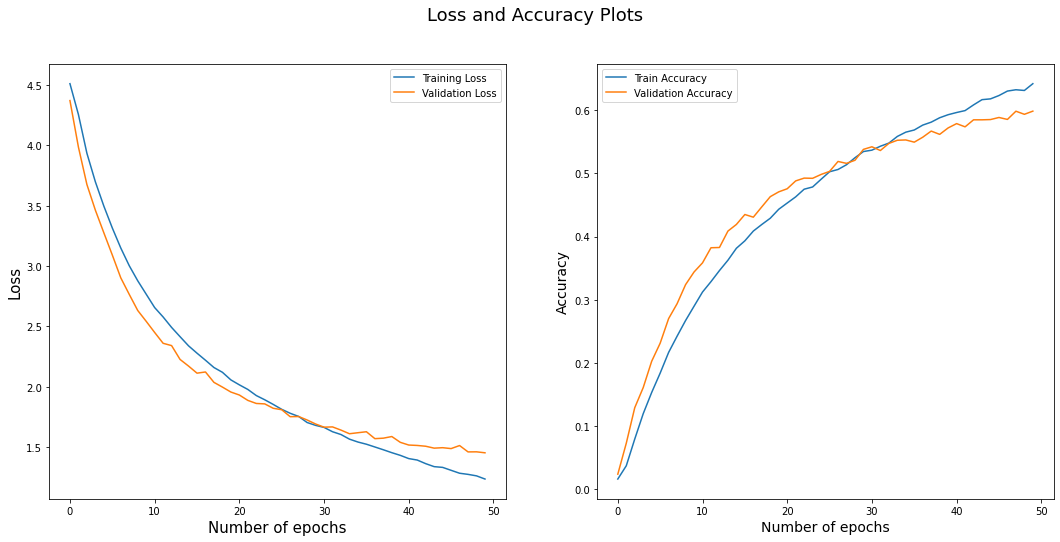

In [36]:
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()


## Print Validation Accuracy/Loss and Test Accuracy/Loss.

In [37]:
valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_gen, steps=10000//batch_size)
test_loss, test_accuracy = model.evaluate_generator(data_gen.flow(X_test, y_test, seed=123), steps=len(X_test)//batch_size)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 2))
print('Test Loss: ', round(test_loss, 2))


<ipython-input-37-c4f3494be259>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_gen, steps=10000//batch_size)
<ipython-input-37-c4f3494be259>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(data_gen.flow(X_test, y_test, seed=123), steps=len(X_test)//batch_size)


Validation Accuracy:  59.93 %
Test Accuracy:  60.0 %
 
Validation Loss:  1.44
Test Loss:  1.43


##Plot Confusion Matrix

In [38]:
y_pred = model.predict(X_test)

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(cm)

313/313 [==============================] - 3s 8ms/step
[[68  0  0 ...  0  0  0]
 [ 0 67  1 ...  0  0  1]
 [ 0  2 46 ...  0  5  0]
 ...
 [ 0  0  0 ... 51  1  1]
 [ 0  0  8 ...  0 38  2]
 [ 0  0  0 ...  0  0 68]]


## Category Prediction (Correct/Incorrect) Analysis

List which category has been predicted incorrectly and which has been predicted correctly.

In [39]:
target = ["Category {}".format(i) for i in range(num_class)]
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target))

              precision    recall  f1-score   support

  Category 0       0.72      0.68      0.70       100
  Category 1       0.68      0.67      0.67       100
  Category 2       0.28      0.46      0.35       100
  Category 3       0.53      0.09      0.15       100
  Category 4       0.67      0.06      0.11       100
  Category 5       0.34      0.39      0.36       100
  Category 6       0.50      0.65      0.57       100
  Category 7       0.71      0.29      0.41       100
  Category 8       0.65      0.60      0.62       100
  Category 9       0.62      0.56      0.59       100
 Category 10       0.50      0.18      0.26       100
 Category 11       0.25      0.28      0.27       100
 Category 12       0.61      0.41      0.49       100
 Category 13       0.62      0.30      0.41       100
 Category 14       0.54      0.31      0.39       100
 Category 15       0.33      0.49      0.39       100
 Category 16       0.67      0.28      0.39       100
 Category 17       0.59    

## Model Prediction

Dataframe of predictions

In [40]:
prediction = np.argmax(y_pred, axis=1)
prediction = pd.DataFrame(prediction)

Generating a random number to display a random image from the dataset along with the true and predicted label

True Label: Mouse
Predicted Label: Telephone


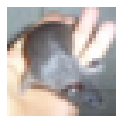

In [41]:
imageId = np.random.randint(0, len(X_test))

rcParams['figure.figsize'] = 2,2

plt.imshow(X_test[imageId])

plt.axis('off')

print("True Label: " + str(subCategory.iloc[testData['fine_labels'][imageId]][0].capitalize()))
print("Predicted Label: " + str(subCategory.iloc[prediction.iloc[imageId]]).split()[2].capitalize())

16 random images to display at a time along with their true and random labels

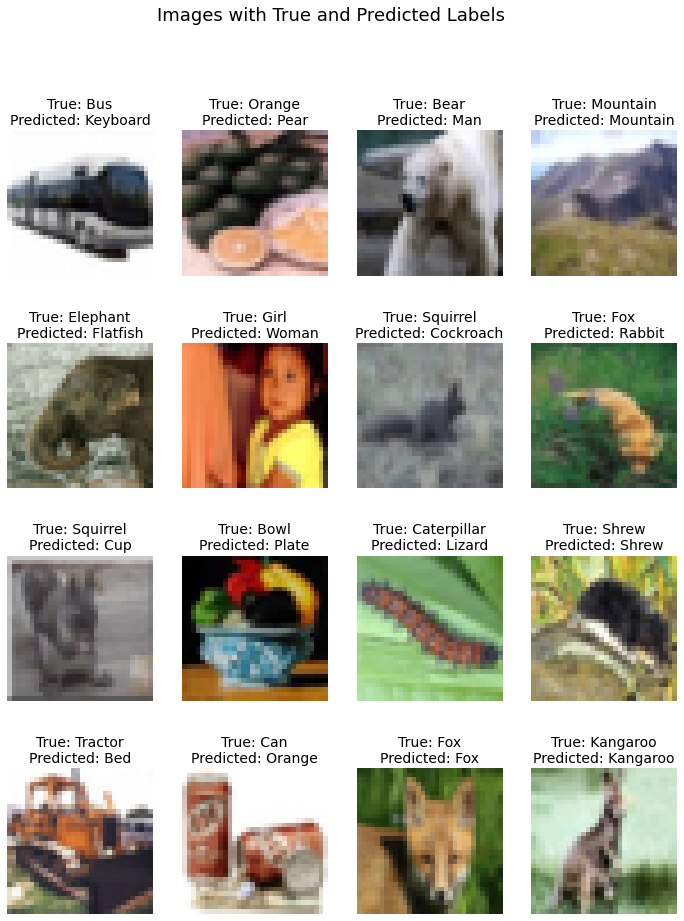

In [42]:
rcParams['figure.figsize'] = 12,15

num_row = 4
num_col = 4

imageId = np.random.randint(0, len(X_test), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_test[imageId[k]])
        axes[i,j].set_title("True: " + str(subCategory.iloc[testData['fine_labels'][imageId[k]]][0]).capitalize() 
                             + "\nPredicted: " + str(subCategory.iloc[prediction.iloc[imageId[k]]]).split()[2].capitalize(), 
                            fontsize=14)
        axes[i,j].axis('off')
        fig.suptitle("Images with True and Predicted Labels", fontsize=18) 

plt.show()


Function to resize the image

In [43]:
def resize_test_image(test_img):

    img = cv2.imread(test_img)
    #plt.imshow(img)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img_RGB)
    resized_img = cv2.resize(img_RGB, (32, 32))
    #plt.imshow(resized_img)
    resized_img = resized_img / 255.
    #plt.imshow(resized_img)
    return resized_img
    
#resize_test_image('orange.jpeg')

Function to get prediction for test image from the model

In [44]:
def predict_test_image(test_img):
    
    resized_img = resize_test_image(test_img)
    prediction = model.predict(np.array([resized_img]))
    
    return prediction

Function to get the sorted prediction

In [45]:
def sort_prediction_test_image(test_img):
    
    prediction = predict_test_image(test_img)
    
    index = np.arange(0,100)
    
    for i in range(100):
        for j in range(100):
            if prediction[0][index[i]] > prediction[0][index[j]]:
                temp = index[i]
                index[i] = index[j]
                index[j] = temp
                
    return index

Function to get the dataframe for top 5 predictions

In [46]:
def df_top5_prediction_test_image(test_img):
    
    sorted_index = sort_prediction_test_image(test_img)
    prediction = predict_test_image(test_img)
    
    subCategory_name = []
    prediction_score = []
    
    k = sorted_index[:6] 
    
    for i in range(len(k)):
        subCategory_name.append(subCategory.iloc[k[i]][0])
        prediction_score.append(round(prediction[0][k[i]], 2))
        
    df = pd.DataFrame(list(zip(subCategory_name, prediction_score)), columns=['Label', 'Probability'])  
    
    return df

df_top5_prediction_test_image('/content/drive/MyDrive/AdvDLProject/orange.jpeg')

1/1 [==============================] - 0s 19ms/step


,Label,Probability
0,orange,1.0
1,sweet_pepper,0.0
2,rose,0.0
3,pear,0.0
4,tulip,0.0
5,poppy,0.0


Function to get the plot for top 5 predictions 

In [47]:
def plot_top5_prediction_test_image(test_img):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    fig.suptitle("Prediction", fontsize=18)
    
    new_img = plt.imread(test_img)
    axes[0].imshow(new_img)
    axes[0].axis('off')
    
    data = df_top5_prediction_test_image(test_img)
    x=df_top5_prediction_test_image(test_img)['Label']
    y=df_top5_prediction_test_image(test_img)['Probability']
    
    axes[1] = sns.barplot(x=x, y=y, data=data, color="green")
    
    plt.xlabel('Label', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    
    plt.ylim(0,1.0)
    
    axes[1].grid(False)
    axes[1].spines["top"].set_visible(False)
    axes[1].spines["right"].set_visible(False)
    axes[1].spines["bottom"].set_visible(False)
    axes[1].spines["left"].set_visible(False)
    
    plt.show()


1/1 [==============================] - 0s 19ms/step


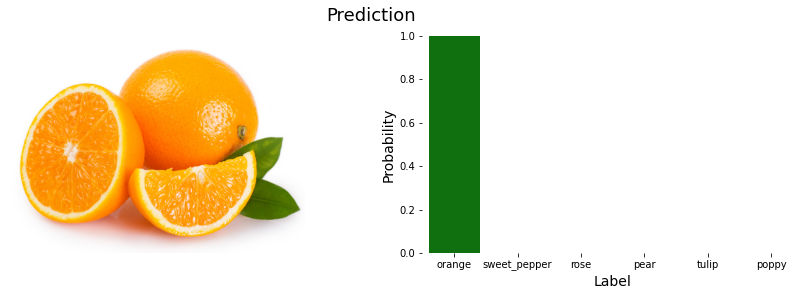

In [48]:
plot_top5_prediction_test_image('/content/drive/MyDrive/AdvDLProject/orange.jpeg')

##Save Model

saving the trained model as data file in .h5 format

In [49]:
model.save('model10.h5')

1/1 [==============================] - 0s 16ms/step


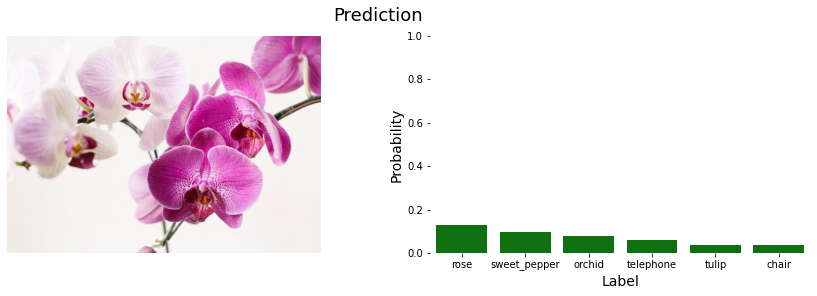

In [50]:
plot_top5_prediction_test_image('/content/drive/MyDrive/AdvDLProject/orchid.jpeg')

##Reload Model

In [51]:
model = load_model("/content/drive/MyDrive/AdvDLProject/best_model.h5")

#Experimentation 2 - EfficientNetB0 model.

Converting class vectors to binary class matrices

In [77]:
y_train_eff = trainData['fine_labels']
y_test_eff = testData['fine_labels']

In [78]:
n_classes = 100

y_train_eff = keras.utils.to_categorical(y_train_eff, n_classes)
y_test_eff = keras.utils.to_categorical(y_test_eff, n_classes)


Splitting the training dataset into training and validation datasets

In [79]:
#using stratified shuffle split to preserve the percentage of samples in each of the 100 classes
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=123)

for train_index, val_index in sss.split(X_train, y_train):
    X_train_data, X_val_data = X_train[train_index], X_train[val_index]
    y_train_data, y_val_data = y_train_eff[train_index], y_train_eff[val_index]

print("Number of training samples: ", X_train_data.shape[0])
print("Number of validation samples: ", X_val_data.shape[0])

Number of training samples:  40000
Number of validation samples:  10000


## Resize Images
Resizing the images as per EfficientNetB0 to size (224, 224)

In [80]:
height = 224
width = 224
channels = 3

n_classes = 100
input_shape = (height, width, channels)

epochs = 15
batch_size = 8

In [81]:
def resize_img(img, shape):
    return cv2.resize(img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)

Define Custom Data Generator class

In [82]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, images, labels=None, mode='fit', batch_size=batch_size, dim=(height, width), channels=channels, n_classes=n_classes, shuffle=True, augment=False):
        
        #initializing the configuration of the generator
        self.images = images
        self.labels = labels
        self.mode = mode
        self.batch_size = batch_size
        self.dim = dim
        self.channels = channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()
   
    #method to be called after every epoch
    def on_epoch_end(self):
        self.indexes = np.arange(self.images.shape[0])
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
    
    #return numbers of steps in an epoch using samples and batch size
    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))
    
    #this method is called with the batch number as an argument to obtain a given batch of data
    def __getitem__(self, index):
        #generate one batch of data
        #generate indexes of batch
        batch_indexes = self.indexes[index * self.batch_size:(index+1) * self.batch_size]
        
        #generate mini-batch of X
        X = np.empty((self.batch_size, *self.dim, self.channels))
        
        for i, ID in enumerate(batch_indexes):
            #generate pre-processed image
            img = self.images[ID]
            #image rescaling
            img = img.astype(np.float32)/255.
            #resizing as per new dimensions
            img = resize_img(img, self.dim)
            X[i] = img
            
        #generate mini-batch of y
        if self.mode == 'fit':
            y = self.labels[batch_indexes]
            
            #augmentation on the training dataset
            if self.augment == True:
                X = self.__augment_batch(X)
            return X, y
        
        elif self.mode == 'predict':
            return X
        
        else:
            raise AttributeError("The mode should be set to either 'fit' or 'predict'.")
            
    #augmentation for one image
    def __random_transform(self, img):
        composition = albu.Compose([albu.HorizontalFlip(p=0.5),
                                   albu.VerticalFlip(p=0.5),
                                   albu.GridDistortion(p=0.2),
                                   albu.ElasticTransform(p=0.2)])
        return composition(image=img)['image']
    
    #augmentation for batch of images
    def __augment_batch(self, img_batch):
        for i in range(img_batch.shape[0]):
            img_batch[i] = self.__random_transform(img_batch[i])
        return img_batch

In [83]:
train_data_generator = DataGenerator(X_train_data, y_train_data, augment=True)
valid_data_generator = DataGenerator(X_val_data, y_val_data, augment=False)

## Using pre-trained EfficientNetB0

In [84]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Initializing EfficientNetB0 model

In [85]:
import efficientnet.keras as efn

efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape, classes=n_classes)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

## Summarize the model

In [86]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               128100    
                                                                 
Total params: 4,177,664
Trainable params: 4,135,648
Non-trainable params: 42,016
_________________________________________________________________


##Compile the model

We use early stopping strategy to monitor the validation loss and avoid overfitting. 

On the other hand, we also use the ReduceLROnPlateau technique for reducing the learning rate when a metric stops getting better. Once learning stagnates, models frequently benefit from reducing the learning rate by 2-10. This callback keeps an eye on a number, and the learning rate slows down if there is no change after a certain number of "patience" epochs.


In [87]:
optimizer = Adam(lr=0.0001)

#early stopping to monitor the validation loss and avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

#reducing learning rate on plateau
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=1)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [88]:
#model compiling
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Train Model

Input the augmented images generated in the earlier step to EfficientnetB0 model.

In [91]:
def train_utils_eff(model, run_name, model_name):
    # Initialize wandb
    wandb.init(project="FinalProject_TL_IC", entity="akanksha09", id=run_name)

    # Train the model
    start = time.time()
    model_history = model.fit_generator(train_data_generator,
                                        validation_data=valid_data_generator,
                                        callbacks=[early_stop, rlrop, [WandbCallback()]],
                                        verbose=1,
                                        epochs=epochs)
    end = time.time() - start
    print("model training time", end)
    wandb.log({"training_time":end})

    # Serialize the model to see the footprint
    model.save(model_name)

    return model_history

In [ ]:
model_history = train_utils_eff(model, "EfficientNetB0", "best_EfficientNetB0_model.h5")

Epoch 1/15


<ipython-input-91-e7d3b9eff167>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_data_generator,


5000/5000 [==============================] - ETA: 0s - loss: 0.8702 - accuracy: 0.7487

wandb: Adding directory to artifact (/content/wandb/run-20221212_035042-EfficientNetB0/files/model-best)... Done. 0.4s


5000/5000 [==============================] - 822s 164ms/step - loss: 0.8702 - accuracy: 0.7487 - val_loss: 0.8085 - val_accuracy: 0.7988 - lr: 1.0000e-04
Epoch 2/15
5000/5000 [==============================] - ETA: 0s - loss: 0.8216 - accuracy: 0.7589

wandb: Adding directory to artifact (/content/wandb/run-20221212_035042-EfficientNetB0/files/model-best)... Done. 0.4s


5000/5000 [==============================] - 811s 162ms/step - loss: 0.8216 - accuracy: 0.7589 - val_loss: 0.7810 - val_accuracy: 0.8024 - lr: 1.0000e-04
Epoch 3/15
5000/5000 [==============================] - 750s 150ms/step - loss: 0.7627 - accuracy: 0.7749 - val_loss: 0.7933 - val_accuracy: 0.8028 - lr: 1.0000e-04
Epoch 4/15
5000/5000 [==============================] - ETA: 0s - loss: 0.7146 - accuracy: 0.7889

wandb: Adding directory to artifact (/content/wandb/run-20221212_035042-EfficientNetB0/files/model-best)... Done. 0.3s


5000/5000 [==============================] - 780s 156ms/step - loss: 0.7146 - accuracy: 0.7889 - val_loss: 0.7765 - val_accuracy: 0.8013 - lr: 1.0000e-04
Epoch 5/15
5000/5000 [==============================] - 743s 149ms/step - loss: 0.6677 - accuracy: 0.8017 - val_loss: 0.7995 - val_accuracy: 0.8057 - lr: 1.0000e-04
Epoch 6/15
5000/5000 [==============================] - 737s 147ms/step - loss: 0.6409 - accuracy: 0.8090 - val_loss: 0.8234 - val_accuracy: 0.8087 - lr: 1.0000e-04
Epoch 7/15
5000/5000 [==============================] - 739s 148ms/step - loss: 0.6084 - accuracy: 0.8181 - val_loss: 0.8426 - val_accuracy: 0.7994 - lr: 1.0000e-04
Epoch 8/15
5000/5000 [==============================] - 728s 146ms/step - loss: 0.5827 - accuracy: 0.8253 - val_loss: 0.8504 - val_accuracy: 0.8025 - lr: 1.0000e-04
Epoch 9/15
5000/5000 [==============================] - ETA: 0s - loss: 0.5535 - accuracy: 0.8335
Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
5000/5000 [=

## Save Weights

Save the trained model weights as data file in .h5 format

In [66]:
model.save_weights("cifar_efficientnetb0_weights.h5")

##Plot Loss/Accuracy

Plot to visualize the loss and accuracy against number of epochs

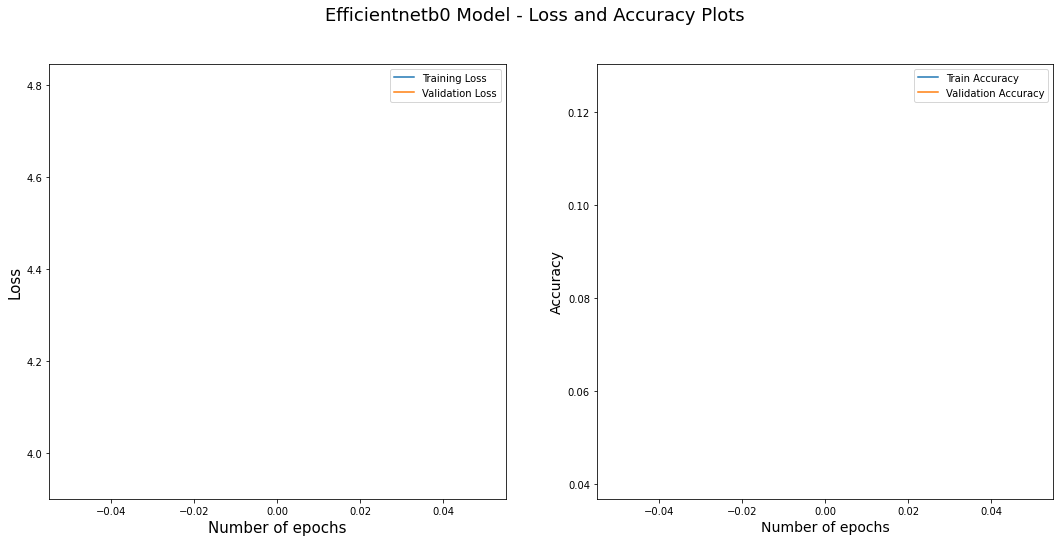

In [67]:
plt.figure(figsize=(18,8))

plt.suptitle('Efficientnetb0 Model - Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

## Model Evaluation

In [68]:
valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_generator, verbose=1)

print('Validation Accuracy: ', round((valid_accuracy * 100), 2), "%")

<ipython-input-68-b88f7db5883a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(generator=valid_data_generator, verbose=1)


1250/1250 [==============================] - 27s 21ms/step - loss: 22.2869 - accuracy: 0.0101
Validation Accuracy:  1.01 %


## Model Prediction

In [69]:
y_pred = model.predict_generator(DataGenerator(X_test, mode='predict', augment=False, shuffle=False), verbose=1)
y_pred = np.argmax(y_pred, axis=1)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

<ipython-input-69-e706dca52755>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(DataGenerator(X_test, mode='predict', augment=False, shuffle=False), verbose=1)


1250/1250 [==============================] - 24s 18ms/step
Test Accuracy:  1.21 %


## Plot Confusion Matrix

In [70]:
print(cm)

[[68  0  0 ...  0  0  0]
 [ 0 67  1 ...  0  0  1]
 [ 0  2 46 ...  0  5  0]
 ...
 [ 0  0  0 ... 51  1  1]
 [ 0  0  8 ...  0 38  2]
 [ 0  0  0 ...  0  0 68]]


In [71]:
#report to see which category has been predicted incorectly and which has been predicted correctly
target = ["Category {}".format(i) for i in range(n_classes)]
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target))

              precision    recall  f1-score   support

  Category 0       0.00      0.00      0.00       100
  Category 1       0.00      0.00      0.00       100
  Category 2       0.00      0.00      0.00       100
  Category 3       0.00      0.00      0.00       100
  Category 4       0.00      0.00      0.00       100
  Category 5       0.00      0.00      0.00       100
  Category 6       0.00      0.00      0.00       100
  Category 7       0.00      0.00      0.00       100
  Category 8       0.00      0.00      0.00       100
  Category 9       0.00      0.00      0.00       100
 Category 10       0.00      0.00      0.00       100
 Category 11       0.00      0.00      0.00       100
 Category 12       0.00      0.00      0.00       100
 Category 13       0.01      0.01      0.01       100
 Category 14       0.01      0.48      0.03       100
 Category 15       0.00      0.00      0.00       100
 Category 16       0.00      0.00      0.00       100
 Category 17       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Predictions

Dataframe of predictions

In [72]:
prediction = pd.DataFrame(y_pred)
prediction.head()

,0
0,55
1,41
2,72
3,62
4,62


Generating a random number to display a random image from the dataset along with the true and predicted label

True Label: Porcupine
Predicted Label: Lawn_mower


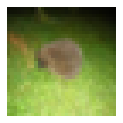

In [73]:
imageId = np.random.randint(0, len(X_test))

rcParams['figure.figsize'] = 2,2

plt.imshow(X_test[imageId])

plt.axis('off')

print("True Label: " + str(subCategory.iloc[testData['fine_labels'][imageId]][0].capitalize()))
print("Predicted Label: " + str(subCategory.iloc[prediction.iloc[imageId]]).split()[2].capitalize())


16 random images to display at a time along with their true and random labels

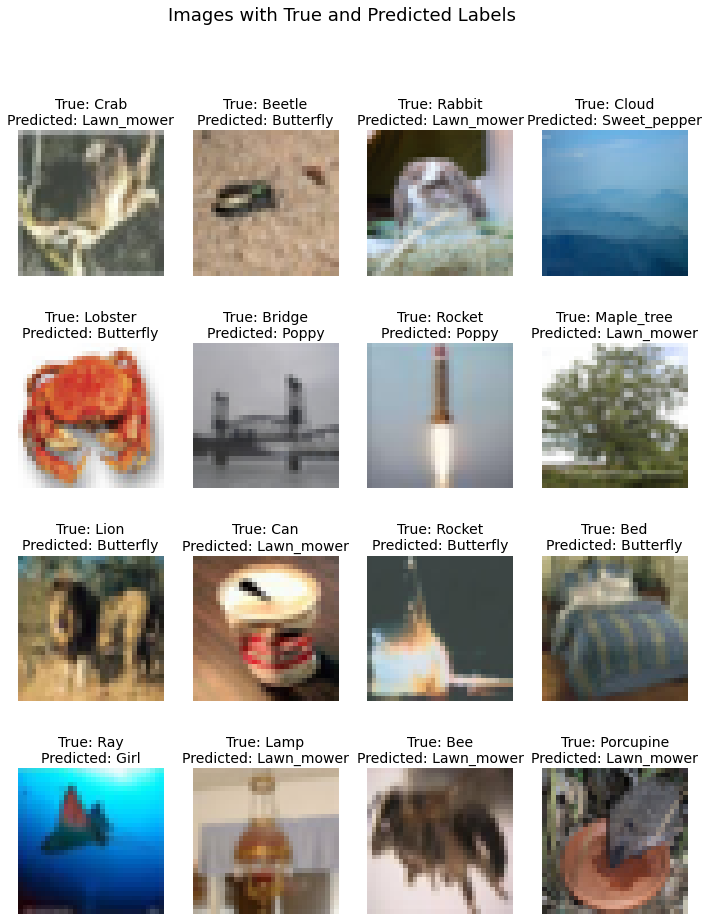

In [74]:
rcParams['figure.figsize'] = 12,15

num_row = 4
num_col = 4

imageId = np.random.randint(0, len(X_test), num_row * num_col)

fig, axes = plt.subplots(num_row, num_col)

for i in range(0, num_row):
    for j in range(0, num_col):
        k = (i*num_col)+j
        axes[i,j].imshow(X_test[imageId[k]])
        axes[i,j].set_title("True: " + str(subCategory.iloc[testData['fine_labels'][imageId[k]]][0]).capitalize() 
                             + "\nPredicted: " + str(subCategory.iloc[prediction.iloc[imageId[k]]]).split()[2].capitalize(), 
                            fontsize=14)
        axes[i,j].axis('off')
        fig.suptitle("Images with True and Predicted Labels", fontsize=18) 

plt.show()

##Save Model

Save the trained model as data file in .h5 format

In [75]:
model.save('cifar_efficientnetb0_model.h5')

CONCLUSION:
Recognition of different images is a simple task for we humans as it is easy for us to distinguish between different features. Somehow our brains are trained un- consciously with a similar type of images that has helped us distinguish between features (images) without putting much effort into the task. For instance, after seeing a few cats, we can recognize almost every different type of cat we encounter in our life. However, machines need a lot of training for feature extraction which becomes a challenge due to high computation cost, memory requirement and processing power. The 9-layer deep neural network model built in this project for CIFAR-100 dataset recognizes and classifies colored images of objects in one of the 100 available categories with 59% accuracy. The ConvNet architecture of the model has three stacks of CONV-RELU layers followed by a POOL layer and then two fully connected (FC) RELU layers followed by a fully connected output layer. The model uses 13,870,484 trainable parameters which has been trained for an hour an half on a GPU with 8vCPUs. The Adam optimizer with learning rate 0.0001 and categorical cross entropy loss has been used to used to support the training process which involved 100 epochs and 64 as the batch size. The reported loss is 1.47. The model used techniques like early stopping and dropout to avoid overfitting. Even after training the model with millions of parameters, the model predicted the class for a few images completely wrong. As it is considered that the performance of a deep learning model increases with the amount of data used in its training, it would be highly possible that such a mediocre accuracy was due to the limited size of the dataset for each class. It is believed that the accuracy of this dataset can be further improved by working on different factors related to model building and hyperparameter tuning.